# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<b>Selected dataset:</b> No-show appointments

<b>Dataset Description:</b> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

In [2]:
# import the used libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load the data and view first few lines of dataset

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

- There are 110527 rows and 14 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Check if there is any missing values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# Check for duplicate rows 
df.duplicated().sum()

0

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### observation 

- some columns need to be renamed such as (Hipertension & Handcap & No-show )
- some columns need to be droped because I willnot use it in analysis.
- from summary statistics , there is a mistake in one of the patient's age . it shows -1 years.


### Data Cleaning

##### Define 
- rename columns

#### Code

In [9]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

#### Test

In [10]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

#### Define 
- delete unused columns

#### Code

In [11]:
#drop PatientId, AppointmentID, ScheduledDay, Appointment day columns
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1,inplace=True)

#### Test

In [12]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Define 
- remove outliers data from age columns like -1 and age > 95

#### Code

In [13]:
df = df[(df.Age >= 0) & (df.Age < 96)]

#### Test

In [14]:
print(sorted(df.Age.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


#### Define
change the values of No_show columns to help in analysis

0 = Showed up to appointment

1 = did not show up to appointment

In [15]:
#Update values in No-show column 
df['No_show'].replace({'No':0,'Yes':1},inplace=True)

In [16]:
df.sample(5)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
56041,F,35,SÃO JOSÉ,0,0,0,1,0,1,0
13491,F,77,ITARARÉ,0,1,1,0,0,1,0
15445,M,1,CRUZAMENTO,0,0,0,0,0,1,0
78673,F,17,ANDORINHAS,0,0,0,0,0,0,0
13323,F,0,ILHA DE SANTA MARIA,0,0,0,0,0,0,1


- save this data set with a new name "clean_data.csv"

In [17]:
df.to_csv('clean_data.csv',index=False)

In [18]:
#read new dataset
df_clean=pd.read_csv('clean_data.csv')
df_clean.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

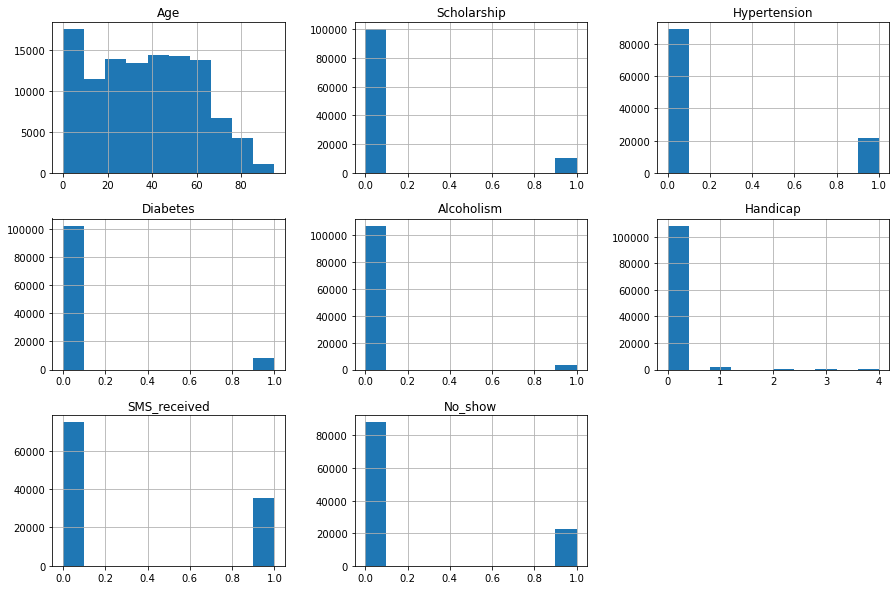

In [19]:
# Histogram of all dataset
df_clean.hist(figsize=(15,10));

based on the histogram charts, we can estimate a few things

- Most of the patients are below 60 years.
- Most of the people are not enrolled in Brasilian welfare program.
- most of the people don't suffer from chronic diseases.
- Most of the people didn't receive SMS.

### Research Question 1: (what is the overall appointment show-up vs. no show-up rate?)

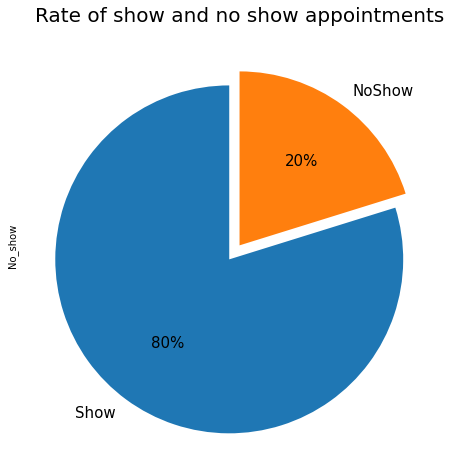

In [20]:
data = df_clean["No_show"].value_counts()
# Draw pie-chart
plt.figure(figsize=(8,8))
data.plot.pie(autopct='%.0f%%',fontsize=(15), labels=['Show','NoShow'], startangle=90, explode=[0.1, 0])
plt.title('Rate of show and no show appointments',fontsize=(20))
plt.show();

Looking at the pie chart above, the overall show-up rate is 80%.


### Research Question 2 (Which gender is display more no-show appointments?)

In [21]:
# create a function to customize ploting
def custom_plot(data,x,y,title,color1,color2,a,b):
    plt.figure(figsize=(8,8))
    data.plot(kind='bar',color=[color1,color2])
    plt.xlabel(x,fontsize=(15))
    plt.ylabel(y,fontsize=(15))
    plt.title(title,fontsize=(25))
    plt.xticks(np.arange(2), (a, b), rotation=10)
    plt.show();

In [22]:
gender_noshow = df_clean.groupby('Gender').sum()['No_show']
gender_noshow 

Gender
F    14588
M     7724
Name: No_show, dtype: int64

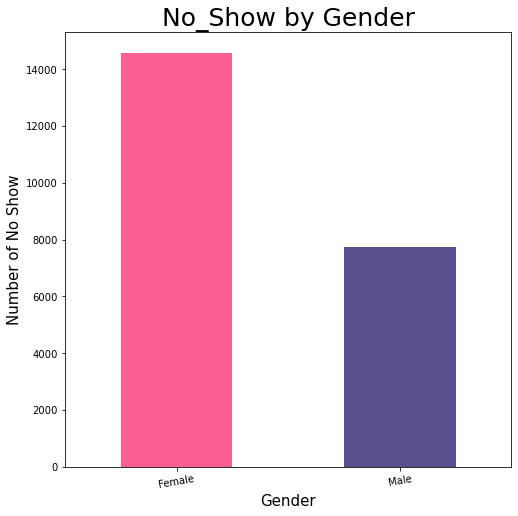

In [23]:
custom_plot(gender_noshow,
            "Gender","Number of No Show",
            'No_Show by Gender',
            '#FB6090','#58508d',
            'Female', 'Male')

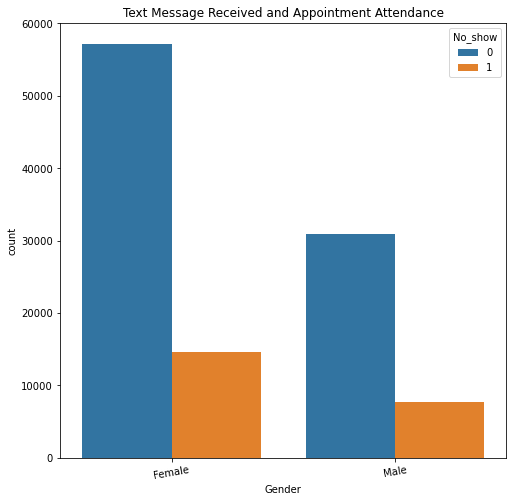

In [33]:
plt.figure(figsize=(8,8))
Text_No_Show = sns.countplot(x=df_clean.Gender, hue = df_clean.No_show)
Text_No_Show.set_title('Text Message Received and Appointment Attendance')
plt.xticks(np.arange(2), ('Female', 'Male'), rotation=10);

- The result from this chart is that  the number of females who missed their appointment is nearly double the number of men.

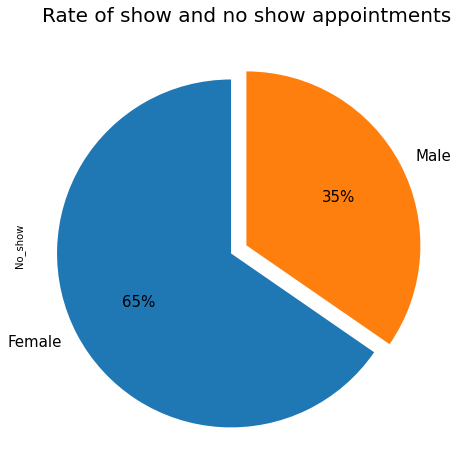

In [25]:
plt.figure(figsize=(8,8))
gender_noshow.plot.pie(autopct='%.0f%%',fontsize=(15), labels=['Female','Male'], startangle=90, explode=[0.1, 0])
plt.title('Rate of show and no show appointments',fontsize=(20))
plt.show();

### Research Question 3 (What ages of patients who miss their appointments?)

In [26]:
showed = df_clean.No_show == 0
notshowed = df_clean.No_show == 1

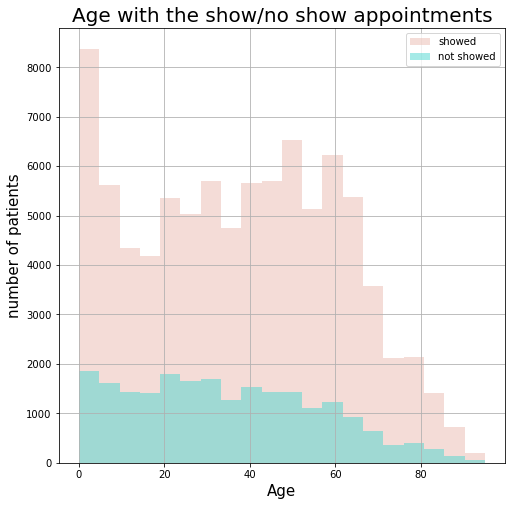

In [27]:

#Plotting age with the show/no show appointments.
df_clean.Age[showed].hist(alpha=0.5, bins=20,label='showed',color = '#EBBBB0', figsize=(8,8))
df_clean.Age[notshowed].hist(alpha= 0.5, bins=20,label='not showed', color = '#4CD7D0');
plt.xlabel("Age",fontsize=(15))
plt.ylabel("number of patients",fontsize=(15))
plt.title('Age with the show/no show appointments',fontsize=(20))
plt.legend()
plt.show();

- The majority of patients under the age of five are committed to their doctor's appointment, and patients over 50 are still committed to their doctor's appointment.

- When  patient's age increases, the number of no-shows decreases. This may be because older people are more likely to be retired, giving them more time and ability to attend appointments than younger people.

### Research Question 4 (What is impact of sending SMS on rate of no-show? )

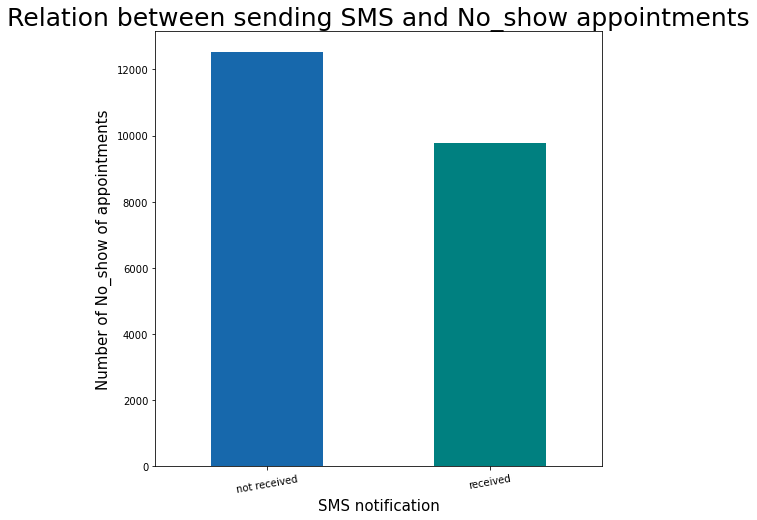

In [28]:
# Grouping by SMS_received for patients who missed thier appointemnts
sms=df_clean.groupby('SMS_received').sum()['No_show']
custom_plot(sms,"SMS notification",
            "Number of No_show of appointments",
            'Relation between sending SMS and No_show appointments' ,
            '#1768AC','teal',
            'not received', 'received')

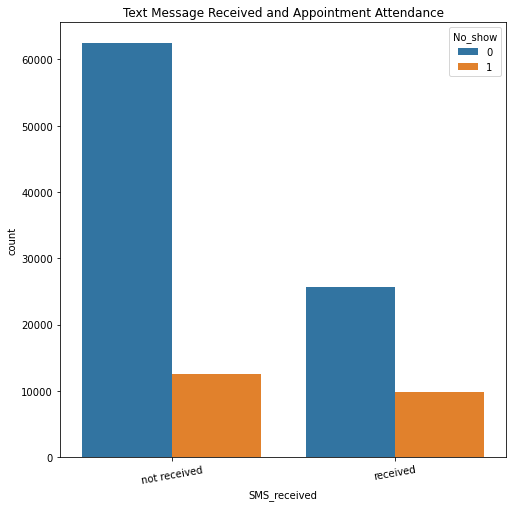

In [32]:
plt.figure(figsize=(8,8))
Text_No_Show = sns.countplot(x=df_clean.SMS_received, hue = df_clean.No_show)
Text_No_Show.set_title('Text Message Received and Appointment Attendance')
plt.xticks(np.arange(2), ('not received', 'received'), rotation=10);

In [29]:
data1 = df_clean.groupby("Scholarship")["No_show"].mean()
data1

Scholarship
0    0.198095
1    0.237363
Name: No_show, dtype: float64

- Surprisingly, sending an SMS alert does not encourage people to show up for their appointment

#### Research Question 5 (What is the correlation between no-show rate and scholarship? )

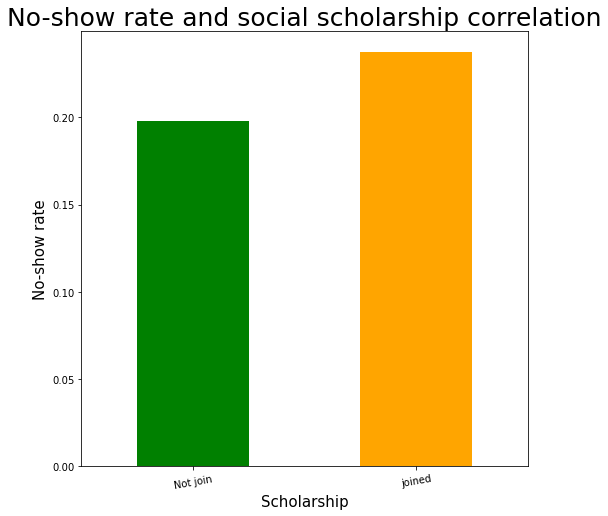

In [30]:
custom_plot(data1,"Scholarship",
            "No-show rate",
            "No-show rate and social scholarship correlation",
            'green','orange',
            'Not join', 'joined')


The percent of patients who No-show are higher with whom had a scholarship

<a id='conclusions'></a>
## Conclusions


- After cleaning the dataset and looking at some of its properties, I couldn't find a characteristic that specifically influences whether or not affects the patient to shows up for the appointment. Just the age varies slightly.

#### Research Question 1 (what is the overall appointment show-up vs. no show-up rate?)
- the overall show-up rate is 80%.
- Although the percentage of no-show appointments is less than the percentage of showed up appointments, it is still a high rate of dissatisfaction for healthcare providers.

#### Research Question 2 (Which gender is display more no-show appointments?)
- Females patients booked aappointments more than men, this shows that women care about their health more than men do.
- The number of females who missed their appointment is nearly double the number of men.


#### Research Question 3 (What ages of patients who miss their appointments?)
- The majority of patients under the age of five are committed to their doctor's appointment, and patients over 50 are still committed to their doctor's appointment.
- When patient's age increases, the number of no-shows decreases. This may be because older people are more likely to be retired, giving them more time and ability to attend appointments than younger people.

#### Research Question 4 (What is impact of sending SMS on rate of no-show? )
- Surprisingly, sending an SMS alert does not encourage people to show up for their appointment.
- SMS messages is not a powerfull option to decrease the number of no-show appointments.

#### Research Question 5 (What is the correlation between no-show rate and scholarship? )
- The percent of patients who No-show are higher with whom had a scholarship.



### Limitation

There are some limitations in the No-show appointments Dataset as:
- The features are still insufficient to determine the true cause of no-show appointments.
- More information, such as profession, marital status, address, and any serious medical conditions, is needed. 
- The data was collected from various locations, and it is unclear if the healthcare centres where the data was collected use the same capabilities in terms of service, technology, and so on.

- As we can see in the "Age" column, there were some negative ages that we had to exclude before proceeding with our study, possibly because they were calculated incorrectly because negative ages are virtually impossible.

#### References:

- Medical Appointment No Show Kaggle discussion. https://www.kaggle.com/joniarroba/noshowappointments/discussion
- Analytics Vidhya - 12 Useful Pandas Techniques in Python for Data Manipulation. https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
- Udacity Nanodegree https://classroom.udacity.com/